In [1]:
import pandas as pd
from rdkit import Chem
from chembl_webresource_client.new_client import new_client
from rdkit.Chem import PandasTools
from IPython.display import HTML

# Search for Target protein

In [2]:
activity = new_client.activity
res = activity.filter(target_chembl_id='CHEMBL1829').filter(standard_type="IC50")

In [3]:
df = pd.DataFrame.from_dict(res)

In [4]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1792263,[],CHEMBL907067,Inhibition of HDAC3 (mean IC50),B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,nM,UO_0000065,None,1.6
1,None,None,1792264,[],CHEMBL907067,Inhibition of HDAC3 (mean IC50),B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,nM,UO_0000065,None,14.0
2,None,None,1911918,[],CHEMBL890785,Inhibition of HDAC3 in HeLa cells,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,pIC50,None,UO_0000065,None,5.5
3,None,None,1923506,[],CHEMBL895791,Inhibition of recombinant HDAC3,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,uM,UO_0000065,None,0.05
4,None,None,1937923,[],CHEMBL895791,Inhibition of recombinant HDAC3,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,uM,UO_0000065,None,0.079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24959990,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5215551,Inhibition of human full length FLAG-tagged HD...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,nM,UO_0000065,None,2.3
2765,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24959991,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5215551,Inhibition of human full length FLAG-tagged HD...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,nM,UO_0000065,None,1.5
2766,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24959992,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5215551,Inhibition of human full length FLAG-tagged HD...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,nM,UO_0000065,None,1.5
2767,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24967404,[],CHEMBL5217450,Inhibition of HDAC3 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,nM,UO_0000065,None,605.0


In [5]:
df.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

# Handling data

If any compounds has missing value for the standard_value and canonical_smiles column then drop it.

In [6]:
df2 = df[df.pchembl_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1792263,[],CHEMBL907067,Inhibition of HDAC3 (mean IC50),B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,nM,UO_0000065,None,1.6
1,None,None,1792264,[],CHEMBL907067,Inhibition of HDAC3 (mean IC50),B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,nM,UO_0000065,None,14.0
2,None,None,1911918,[],CHEMBL890785,Inhibition of HDAC3 in HeLa cells,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,pIC50,None,UO_0000065,None,5.5
3,None,None,1923506,[],CHEMBL895791,Inhibition of recombinant HDAC3,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,uM,UO_0000065,None,0.05
4,None,None,1937923,[],CHEMBL895791,Inhibition of recombinant HDAC3,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,uM,UO_0000065,None,0.079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24959988,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5215551,Inhibition of human full length FLAG-tagged HD...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,nM,UO_0000065,None,1.3
2763,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24959989,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5215551,Inhibition of human full length FLAG-tagged HD...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,nM,UO_0000065,None,1.9
2764,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24959990,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5215551,Inhibition of human full length FLAG-tagged HD...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,nM,UO_0000065,None,2.3
2767,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24967404,[],CHEMBL5217450,Inhibition of HDAC3 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 3,9606,None,None,IC50,nM,UO_0000065,None,605.0


In [7]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value','pchembl_value', 'document_chembl_id']

In [8]:
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id
0,CHEMBL216641,COc1ccc2[nH]c(C)c(CC(=O)N[C@@H](CCCCCC(=O)NO)C...,1.6,8.80,CHEMBL1137275
1,CHEMBL217651,CC(=O)CCCCC[C@H](NC(=O)C1CCCCN1C)C(=O)Nc1nc(-c...,14.0,7.85,CHEMBL1137275
2,CHEMBL242039,CCSC(=S)SCC(=O)c1ccc(OC)cc1,3162.28,5.50,CHEMBL1146229
3,CHEMBL242533,O=C(/C=C/c1cccc(C(=O)c2cc3ccccc3[nH]2)c1)NO,50.0,7.30,CHEMBL1148761
4,CHEMBL390452,O=C(/C=C/c1cccc(C(=O)c2cc3ccccc3o2)c1)NO,79.0,7.10,CHEMBL1148761
...,...,...,...,...,...
2762,CHEMBL5220408,CCC(=O)CCCCC[C@H](NC(=O)[C@H]1CC12CCN(C)CC2)c1...,1.3,8.89,CHEMBL5214898
2763,CHEMBL5219978,CCC(=O)CCCCC[C@H](NC(=O)[C@H]1CC12CCN(C)CC2)c1...,1.9,8.72,CHEMBL5214898
2764,CHEMBL5218487,CCC(=O)CCCCC[C@H](NC(=O)[C@H]1CC12CCN(CC)CC2)c...,2.3,8.64,CHEMBL5214898
2767,CHEMBL27759,Nc1ccccc1NC(=O)c1ccc(CNC(=O)OCc2cccnc2)cc1,605.0,6.22,CHEMBL5214973


In [9]:
def convert_smi_to_canon_smi(smi):
    canon_smi = Chem.MolToSmiles(Chem.MolFromSmiles(smi),isomericSmiles = False)
    return canon_smi 

In [10]:
df3["canonical_smiles"] = df3.apply(lambda x: convert_smi_to_canon_smi(x.canonical_smiles), axis=1)

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df3

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id
0,CHEMBL216641,COc1ccc2[nH]c(C)c(CC(=O)NC(CCCCCC(=O)NO)C(=O)N...,1.6,8.80,CHEMBL1137275
1,CHEMBL217651,CC(=O)CCCCCC(NC(=O)C1CCCCN1C)C(=O)Nc1nc(-c2ccc...,14.0,7.85,CHEMBL1137275
2,CHEMBL242039,CCSC(=S)SCC(=O)c1ccc(OC)cc1,3162.28,5.50,CHEMBL1146229
3,CHEMBL242533,O=C(C=Cc1cccc(C(=O)c2cc3ccccc3[nH]2)c1)NO,50.0,7.30,CHEMBL1148761
4,CHEMBL390452,O=C(C=Cc1cccc(C(=O)c2cc3ccccc3o2)c1)NO,79.0,7.10,CHEMBL1148761
...,...,...,...,...,...
2762,CHEMBL5220408,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(C)CC2)c1ncc(-c2c...,1.3,8.89,CHEMBL5214898
2763,CHEMBL5219978,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(C)CC2)c1ncc(-c2c...,1.9,8.72,CHEMBL5214898
2764,CHEMBL5218487,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC)CC2)c1ncc(-c2...,2.3,8.64,CHEMBL5214898
2767,CHEMBL27759,Nc1ccccc1NC(=O)c1ccc(CNC(=O)OCc2cccnc2)cc1,605.0,6.22,CHEMBL5214973


In [12]:
df3['pchembl_value'] = pd.to_numeric(df3['pchembl_value'], downcast="float")

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
mean_std = df3.groupby(['canonical_smiles'], as_index=False).agg({'pchembl_value':['mean','std']})
mean_std

canonical_smiles pchembl_value    
                                                                 mean std
0                C#CCN(C)Cc1cccc(NC(=O)CCCCCCC(=O)NO)c1          6.88 NaN
1      C#Cc1cccc(Nc2ncnc3cc(NC(=O)CCCCCCC(=O)NO)sc23)c1          7.61 NaN
2     C#Cc1cccc(Nc2ncnc3cc(NC(=O)c4ccc(C(=O)Nc5ccccc...          6.30 NaN
3     C#Cc1cccc(Nc2ncnc3cc(NC(=O)c4ccc(C(=O)Nc5ccccc...          6.50 NaN
4     C#Cc1cccc(Nc2ncnc3cc(NC(=O)c4ccc(C(=O)Nc5ccccc...          6.11 NaN
...                                                 ...           ...  ..
1805                          S=C1Sc2cccc(I)c2C2=NCCN12          4.37 NaN
1806  [N-]=[N+]=NCc1cc(COc2ccc(NC(=O)CCCCCCC(=O)NO)c...          5.83 NaN
1807  [N-]=[N+]=NCc1cc(Cn2cc(NC(=O)CCCCCCC(=O)NO)cn2...          6.89 NaN
1808  [N-]=[N+]=NCc1cc(N=[N+]=[N-])cc(C(=O)Nc2ccc(-c...          7.35 NaN
1809  [N-]=[N+]=Nc1ccc(C(=O)NC(CCCCNC(=O)CCCCC2SCC3N...          7.38 NaN

[1810 rows x 3 columns]

In [14]:
df4 = df3.merge(mean_std, on=['canonical_smiles'])

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:9203: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  validate=validate,
C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [15]:
df4

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id,"(pchembl_value, mean)","(pchembl_value, std)"
0,CHEMBL216641,COc1ccc2[nH]c(C)c(CC(=O)NC(CCCCCC(=O)NO)C(=O)N...,1.6,8.80,CHEMBL1137275,8.80,NaN
1,CHEMBL217651,CC(=O)CCCCCC(NC(=O)C1CCCCN1C)C(=O)Nc1nc(-c2ccc...,14.0,7.85,CHEMBL1137275,7.85,NaN
2,CHEMBL242039,CCSC(=S)SCC(=O)c1ccc(OC)cc1,3162.28,5.50,CHEMBL1146229,5.50,NaN
3,CHEMBL242533,O=C(C=Cc1cccc(C(=O)c2cc3ccccc3[nH]2)c1)NO,50.0,7.30,CHEMBL1148761,7.30,NaN
4,CHEMBL390452,O=C(C=Cc1cccc(C(=O)c2cc3ccccc3o2)c1)NO,79.0,7.10,CHEMBL1148761,7.10,NaN
...,...,...,...,...,...,...,...
2262,CHEMBL5219490,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC)CC2)c1ncc(-c2...,0.49,9.31,CHEMBL5214898,9.31,NaN
2263,CHEMBL5220454,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC)CC2)c1ncc(-c2...,0.4,9.40,CHEMBL5214898,9.40,NaN
2264,CHEMBL5220408,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(C)CC2)c1ncc(-c2c...,1.3,8.89,CHEMBL5214898,8.89,NaN
2265,CHEMBL5219978,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(C)CC2)c1ncc(-c2c...,1.9,8.72,CHEMBL5214898,8.72,NaN


In [16]:
df4[('pchembl_value', 'std')] = df4[('pchembl_value', 'std')]. fillna (0)

In [17]:
#keep only SD less thab 0.5 SD
df2_dub = df4[(df4[('pchembl_value', 'std')] < 0.5)]
df2_dub

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id,"(pchembl_value, mean)","(pchembl_value, std)"
0,CHEMBL216641,COc1ccc2[nH]c(C)c(CC(=O)NC(CCCCCC(=O)NO)C(=O)N...,1.6,8.80,CHEMBL1137275,8.80,0.0
1,CHEMBL217651,CC(=O)CCCCCC(NC(=O)C1CCCCN1C)C(=O)Nc1nc(-c2ccc...,14.0,7.85,CHEMBL1137275,7.85,0.0
2,CHEMBL242039,CCSC(=S)SCC(=O)c1ccc(OC)cc1,3162.28,5.50,CHEMBL1146229,5.50,0.0
3,CHEMBL242533,O=C(C=Cc1cccc(C(=O)c2cc3ccccc3[nH]2)c1)NO,50.0,7.30,CHEMBL1148761,7.30,0.0
4,CHEMBL390452,O=C(C=Cc1cccc(C(=O)c2cc3ccccc3o2)c1)NO,79.0,7.10,CHEMBL1148761,7.10,0.0
...,...,...,...,...,...,...,...
2262,CHEMBL5219490,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC)CC2)c1ncc(-c2...,0.49,9.31,CHEMBL5214898,9.31,0.0
2263,CHEMBL5220454,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC)CC2)c1ncc(-c2...,0.4,9.40,CHEMBL5214898,9.40,0.0
2264,CHEMBL5220408,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(C)CC2)c1ncc(-c2c...,1.3,8.89,CHEMBL5214898,8.89,0.0
2265,CHEMBL5219978,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(C)CC2)c1ncc(-c2c...,1.9,8.72,CHEMBL5214898,8.72,0.0


In [18]:
df2_nr = df2_dub.drop_duplicates(subset='canonical_smiles', keep='first')
df2_nr

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id,"(pchembl_value, mean)","(pchembl_value, std)"
0,CHEMBL216641,COc1ccc2[nH]c(C)c(CC(=O)NC(CCCCCC(=O)NO)C(=O)N...,1.6,8.80,CHEMBL1137275,8.80,0.0
1,CHEMBL217651,CC(=O)CCCCCC(NC(=O)C1CCCCN1C)C(=O)Nc1nc(-c2ccc...,14.0,7.85,CHEMBL1137275,7.85,0.0
2,CHEMBL242039,CCSC(=S)SCC(=O)c1ccc(OC)cc1,3162.28,5.50,CHEMBL1146229,5.50,0.0
3,CHEMBL242533,O=C(C=Cc1cccc(C(=O)c2cc3ccccc3[nH]2)c1)NO,50.0,7.30,CHEMBL1148761,7.30,0.0
4,CHEMBL390452,O=C(C=Cc1cccc(C(=O)c2cc3ccccc3o2)c1)NO,79.0,7.10,CHEMBL1148761,7.10,0.0
...,...,...,...,...,...,...,...
2262,CHEMBL5219490,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC)CC2)c1ncc(-c2...,0.49,9.31,CHEMBL5214898,9.31,0.0
2263,CHEMBL5220454,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC)CC2)c1ncc(-c2...,0.4,9.40,CHEMBL5214898,9.40,0.0
2264,CHEMBL5220408,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(C)CC2)c1ncc(-c2c...,1.3,8.89,CHEMBL5214898,8.89,0.0
2265,CHEMBL5219978,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(C)CC2)c1ncc(-c2c...,1.9,8.72,CHEMBL5214898,8.72,0.0


In [19]:
df2_nr.rename(columns = {('pchembl_value', 'mean'):'pchembl_value_mean',('pchembl_value', 'std'):'pchembl_value_std'}, inplace = True )

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
df2_nr

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id,pchembl_value_mean,pchembl_value_std
0,CHEMBL216641,COc1ccc2[nH]c(C)c(CC(=O)NC(CCCCCC(=O)NO)C(=O)N...,1.6,8.80,CHEMBL1137275,8.80,0.0
1,CHEMBL217651,CC(=O)CCCCCC(NC(=O)C1CCCCN1C)C(=O)Nc1nc(-c2ccc...,14.0,7.85,CHEMBL1137275,7.85,0.0
2,CHEMBL242039,CCSC(=S)SCC(=O)c1ccc(OC)cc1,3162.28,5.50,CHEMBL1146229,5.50,0.0
3,CHEMBL242533,O=C(C=Cc1cccc(C(=O)c2cc3ccccc3[nH]2)c1)NO,50.0,7.30,CHEMBL1148761,7.30,0.0
4,CHEMBL390452,O=C(C=Cc1cccc(C(=O)c2cc3ccccc3o2)c1)NO,79.0,7.10,CHEMBL1148761,7.10,0.0
...,...,...,...,...,...,...,...
2262,CHEMBL5219490,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC)CC2)c1ncc(-c2...,0.49,9.31,CHEMBL5214898,9.31,0.0
2263,CHEMBL5220454,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC)CC2)c1ncc(-c2...,0.4,9.40,CHEMBL5214898,9.40,0.0
2264,CHEMBL5220408,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(C)CC2)c1ncc(-c2c...,1.3,8.89,CHEMBL5214898,8.89,0.0
2265,CHEMBL5219978,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(C)CC2)c1ncc(-c2c...,1.9,8.72,CHEMBL5214898,8.72,0.0


In [21]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value','pchembl_value_mean', 'pchembl_value_std', 'document_chembl_id']

In [22]:
df5=df2_nr[selection]
df5

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value_mean,pchembl_value_std,document_chembl_id
0,CHEMBL216641,COc1ccc2[nH]c(C)c(CC(=O)NC(CCCCCC(=O)NO)C(=O)N...,1.6,8.80,0.0,CHEMBL1137275
1,CHEMBL217651,CC(=O)CCCCCC(NC(=O)C1CCCCN1C)C(=O)Nc1nc(-c2ccc...,14.0,7.85,0.0,CHEMBL1137275
2,CHEMBL242039,CCSC(=S)SCC(=O)c1ccc(OC)cc1,3162.28,5.50,0.0,CHEMBL1146229
3,CHEMBL242533,O=C(C=Cc1cccc(C(=O)c2cc3ccccc3[nH]2)c1)NO,50.0,7.30,0.0,CHEMBL1148761
4,CHEMBL390452,O=C(C=Cc1cccc(C(=O)c2cc3ccccc3o2)c1)NO,79.0,7.10,0.0,CHEMBL1148761
...,...,...,...,...,...,...
2262,CHEMBL5219490,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC)CC2)c1ncc(-c2...,0.49,9.31,0.0,CHEMBL5214898
2263,CHEMBL5220454,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC)CC2)c1ncc(-c2...,0.4,9.40,0.0,CHEMBL5214898
2264,CHEMBL5220408,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(C)CC2)c1ncc(-c2c...,1.3,8.89,0.0,CHEMBL5214898
2265,CHEMBL5219978,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(C)CC2)c1ncc(-c2c...,1.9,8.72,0.0,CHEMBL5214898


In [23]:
def remove_salt(smi):
    if '.' in smi:
        smi='SALT_MIX'
    
    return smi

In [24]:
df5["canonical_smiles"] = df5.apply(lambda x: remove_salt(x.canonical_smiles), axis=1)

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df6 = df5[(df5[('canonical_smiles')] != 'SALT_MIX')]

In [26]:
df6

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value_mean,pchembl_value_std,document_chembl_id
0,CHEMBL216641,COc1ccc2[nH]c(C)c(CC(=O)NC(CCCCCC(=O)NO)C(=O)N...,1.6,8.80,0.0,CHEMBL1137275
1,CHEMBL217651,CC(=O)CCCCCC(NC(=O)C1CCCCN1C)C(=O)Nc1nc(-c2ccc...,14.0,7.85,0.0,CHEMBL1137275
2,CHEMBL242039,CCSC(=S)SCC(=O)c1ccc(OC)cc1,3162.28,5.50,0.0,CHEMBL1146229
3,CHEMBL242533,O=C(C=Cc1cccc(C(=O)c2cc3ccccc3[nH]2)c1)NO,50.0,7.30,0.0,CHEMBL1148761
4,CHEMBL390452,O=C(C=Cc1cccc(C(=O)c2cc3ccccc3o2)c1)NO,79.0,7.10,0.0,CHEMBL1148761
...,...,...,...,...,...,...
2262,CHEMBL5219490,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC)CC2)c1ncc(-c2...,0.49,9.31,0.0,CHEMBL5214898
2263,CHEMBL5220454,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC)CC2)c1ncc(-c2...,0.4,9.40,0.0,CHEMBL5214898
2264,CHEMBL5220408,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(C)CC2)c1ncc(-c2c...,1.3,8.89,0.0,CHEMBL5214898
2265,CHEMBL5219978,CCC(=O)CCCCCC(NC(=O)C1CC12CCN(C)CC2)c1ncc(-c2c...,1.9,8.72,0.0,CHEMBL5214898


In [27]:
df6.sort_values(by='pchembl_value_std')

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value_mean,pchembl_value_std,document_chembl_id
0,CHEMBL216641,COc1ccc2[nH]c(C)c(CC(=O)NC(CCCCCC(=O)NO)C(=O)N...,1.6,8.800000,0.000000,CHEMBL1137275
1530,CHEMBL4208487,CCCc1nc(C)c2c(=O)[nH]c(-c3cc(CC4CC(C(=O)NO)C4)...,854.0,6.070000,0.000000,CHEMBL4196089
1529,CHEMBL4213341,Cc1c2ccc(N(C)c3ccnc(Nc4ccc(C(=O)Nc5ccccc5N)cc4...,430.0,6.370000,0.000000,CHEMBL4190394
1528,CHEMBL4211776,Cc1c2ccc(N(C)c3ccnc(Nc4ccc(C(=O)NCCCCCCCC(=O)N...,660.0,6.180000,0.000000,CHEMBL4190394
1527,CHEMBL4174805,CCOc1cc(C(C)(C)C)ccc1C1=NC(c2ccc(Cl)cc2)C(c2cc...,178.3,6.750000,0.000000,CHEMBL4152341
...,...,...,...,...,...,...
630,CHEMBL3287022,Cc1nc(-c2nc(C(=O)NCCCCC(=O)NO)cs2)cs1,150.0,6.515000,0.431335,CHEMBL3286308
15,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,100.0,7.216412,0.458932,CHEMBL1140803
1766,CHEMBL4747272,CCCCNNC(=O)c1ccc(OC)cc1,156.7,6.470000,0.466691,CHEMBL4680089
1781,CHEMBL4752853,CCCCNNC(=O)C=Cc1ccccc1,294.5,6.185000,0.487904,CHEMBL4680089


In [28]:
data=df6.drop(['standard_value', 'pchembl_value_std' ], axis=1)

In [29]:
data.describe()

,pchembl_value_mean
count,1751.000000
mean,6.639125
std,1.220004
min,4.010000
25%,5.795000
50%,6.550000
75%,7.390000
max,10.220000


# Creating training and test samples

In [30]:
data=data.sort_values(by='pchembl_value_mean')
data.head(30)

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,document_chembl_id
1105,CHEMBL3982264,CCCCCCC(CCCCCC(=O)Nc1ccccc1)C(=O)NO,4.01,CHEMBL3877334
457,CHEMBL1835671,CCC(CCCCC(=O)Nc1ccccc1)CC(=O)NO,4.01,CHEMBL1833846
1103,CHEMBL435160,O=C(CCCCCC(Cc1ccccc1)C(=O)NO)Nc1ccccc1,4.04,CHEMBL3877334
444,CHEMBL1767041,CNC(=O)C(CCCCCCNC(=O)c1cc(-c2cccc(NC(=O)OC(C)(...,4.05,CHEMBL1765034
439,CHEMBL1767035,CNC(=O)C(CCCCCCC(=O)Nc1cccc(Br)c1)=NO,4.05,CHEMBL1765034
453,CHEMBL1800375,Cc1cc(O)nc(SCC(=O)c2ccc(Cl)cc2)n1,4.06,CHEMBL1800036
1993,CHEMBL4847471,Cn1c(SCCCCCC(=O)O)nnc1-c1ccncc1,4.07,CHEMBL4823270
602,CHEMBL561209,COc1ccc(-c2ccc(C=CC(=O)NO)cc2)cc1,4.07,CHEMBL3232764
1996,CHEMBL4866619,Cn1c(SCCCCCC(=O)Nc2ccccc2N)nnc1-c1ccncc1,4.08,CHEMBL4823270
434,CHEMBL1668018,O=C(CCC1=CCN(CCCc2ccc3ccccc3c2)C1=O)NO,4.10,CHEMBL1667837


In [31]:
data_test=data.loc[::5]
data_test.head(20)

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,document_chembl_id
1105,CHEMBL3982264,CCCCCCC(CCCCCC(=O)Nc1ccccc1)C(=O)NO,4.01,CHEMBL3877334
453,CHEMBL1800375,Cc1cc(O)nc(SCC(=O)c2ccc(Cl)cc2)n1,4.06,CHEMBL1800036
1966,CHEMBL4852895,C=Cc1c(C)c2cc3nc(c(C(=O)OC)c4[nH]c(cc5nc(cc1[n...,4.14,CHEMBL4814003
1487,CHEMBL4078716,COc1ccc(C(=O)NC(Cc2c[nH]c3ccccc23)C(=O)Nc2ccc(...,4.20,CHEMBL4020724
1662,CHEMBL4466529,N#Cc1ccc2c(c1)SC(=S)N1CCCN=C21,4.30,CHEMBL4406872
1417,CHEMBL3968125,CCC(CC)(c1ccc(OCC(O)C(C)(C)C)c(C)c1)c1cc(C)c(C...,4.33,CHEMBL3886894
2002,CHEMBL4854089,C=CCn1c(SCc2ccc(C(=O)Nc3ccccc3N)cc2)nnc1-c1ccncc1,4.38,CHEMBL4823270
1411,CHEMBL3914611,CCC(CC)(c1ccc(OCC(=O)NO)c(C)c1)c1ccc(OCC(CO)CO...,4.44,CHEMBL3886894
468,CHEMBL2046617,COc1ccc(C=CC(=O)NCCCCN2CCc3nc(C(=O)NO)sc3C2)cc1,4.47,CHEMBL2046379
1418,CHEMBL3929537,CCC(CC)(c1ccc(OCC(=O)NO)c(C)c1)c1cc(C)c(CCC(O)...,4.52,CHEMBL3886894


In [32]:
data_work=data.drop(data.loc[::5].index)

In [33]:
data.head(30)

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,document_chembl_id
1105,CHEMBL3982264,CCCCCCC(CCCCCC(=O)Nc1ccccc1)C(=O)NO,4.01,CHEMBL3877334
457,CHEMBL1835671,CCC(CCCCC(=O)Nc1ccccc1)CC(=O)NO,4.01,CHEMBL1833846
1103,CHEMBL435160,O=C(CCCCCC(Cc1ccccc1)C(=O)NO)Nc1ccccc1,4.04,CHEMBL3877334
444,CHEMBL1767041,CNC(=O)C(CCCCCCNC(=O)c1cc(-c2cccc(NC(=O)OC(C)(...,4.05,CHEMBL1765034
439,CHEMBL1767035,CNC(=O)C(CCCCCCC(=O)Nc1cccc(Br)c1)=NO,4.05,CHEMBL1765034
453,CHEMBL1800375,Cc1cc(O)nc(SCC(=O)c2ccc(Cl)cc2)n1,4.06,CHEMBL1800036
1993,CHEMBL4847471,Cn1c(SCCCCCC(=O)O)nnc1-c1ccncc1,4.07,CHEMBL4823270
602,CHEMBL561209,COc1ccc(-c2ccc(C=CC(=O)NO)cc2)cc1,4.07,CHEMBL3232764
1996,CHEMBL4866619,Cn1c(SCCCCCC(=O)Nc2ccccc2N)nnc1-c1ccncc1,4.08,CHEMBL4823270
434,CHEMBL1668018,O=C(CCC1=CCN(CCCc2ccc3ccccc3c2)C1=O)NO,4.10,CHEMBL1667837


In [34]:
data_work.head(25)

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,document_chembl_id
457,CHEMBL1835671,CCC(CCCCC(=O)Nc1ccccc1)CC(=O)NO,4.01,CHEMBL1833846
1103,CHEMBL435160,O=C(CCCCCC(Cc1ccccc1)C(=O)NO)Nc1ccccc1,4.04,CHEMBL3877334
444,CHEMBL1767041,CNC(=O)C(CCCCCCNC(=O)c1cc(-c2cccc(NC(=O)OC(C)(...,4.05,CHEMBL1765034
439,CHEMBL1767035,CNC(=O)C(CCCCCCC(=O)Nc1cccc(Br)c1)=NO,4.05,CHEMBL1765034
1993,CHEMBL4847471,Cn1c(SCCCCCC(=O)O)nnc1-c1ccncc1,4.07,CHEMBL4823270
602,CHEMBL561209,COc1ccc(-c2ccc(C=CC(=O)NO)cc2)cc1,4.07,CHEMBL3232764
1996,CHEMBL4866619,Cn1c(SCCCCCC(=O)Nc2ccccc2N)nnc1-c1ccncc1,4.08,CHEMBL4823270
434,CHEMBL1668018,O=C(CCC1=CCN(CCCc2ccc3ccccc3c2)C1=O)NO,4.10,CHEMBL1667837
2001,CHEMBL4857194,Cn1c(SCc2ccc(C(=O)Nc3ccccc3N)cc2)nnc1-c1ccncc1,4.15,CHEMBL4823270
333,CHEMBL561909,Nc1ccccc1NC(=O)CCCCCC(NC(=O)CNC(=O)C(N)Cc1cccc...,4.16,CHEMBL1151874


# Creating sdf files

Creating test set

In [35]:
PandasTools.AddMoleculeColumnToFrame(data_test, 'canonical_smiles', 'Molecule')

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\rdkit\Chem\PandasTools.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,molecule_chembl_id,canonical_smiles,pchembl_value_mean,document_chembl_id,Molecule
1105,CHEMBL3982264,CCCCCCC(CCCCCC(=O)Nc1ccccc1)C(=O)NO,4.01,CHEMBL3877334,
453,CHEMBL1800375,Cc1cc(O)nc(SCC(=O)c2ccc(Cl)cc2)n1,4.06,CHEMBL1800036,
1966,CHEMBL4852895,C=Cc1c(C)c2cc3nc(c(C(=O)OC)c4[nH]c(cc5nc(cc1[nH]2)C(C)=C5CC)c(C)c4C(=O)OC)C(CCC(=O)Nc1ccc(C(=O)Nc2ccccc2N)cc1)C3C,4.14,CHEMBL4814003,
1487,CHEMBL4078716,COc1ccc(C(=O)NC(Cc2c[nH]c3ccccc23)C(=O)Nc2ccc(C(=O)Nc3cc(-c4cccs4)ccc3N)cc2)cc1,4.20,CHEMBL4020724,
1662,CHEMBL4466529,N#Cc1ccc2c(c1)SC(=S)N1CCCN=C21,4.30,CHEMBL4406872,

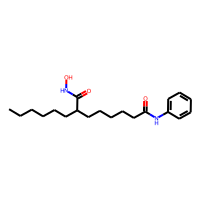
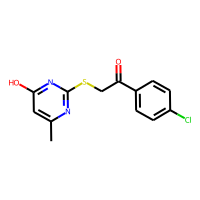
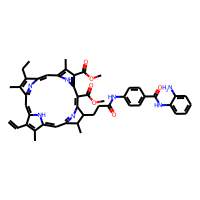
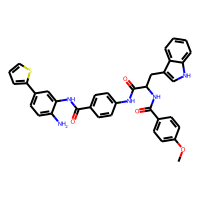
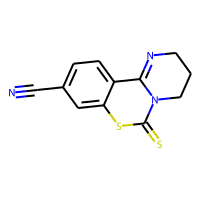

In [36]:
HTML(data_test.head().to_html())

In [37]:
PandasTools.WriteSDF(data_test, 'HDAC3_test.sdf', molColName='Molecule', properties=list(data.columns))

Creating work set

In [38]:
PandasTools.AddMoleculeColumnToFrame(data_work, 'canonical_smiles', 'Molecule')

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,document_chembl_id,Molecule
457,CHEMBL1835671,CCC(CCCCC(=O)Nc1ccccc1)CC(=O)NO,4.01,CHEMBL1833846,
1103,CHEMBL435160,O=C(CCCCCC(Cc1ccccc1)C(=O)NO)Nc1ccccc1,4.04,CHEMBL3877334,
444,CHEMBL1767041,CNC(=O)C(CCCCCCNC(=O)c1cc(-c2cccc(NC(=O)OC(C)(C)C)c2)on1)=NO,4.05,CHEMBL1765034,
439,CHEMBL1767035,CNC(=O)C(CCCCCCC(=O)Nc1cccc(Br)c1)=NO,4.05,CHEMBL1765034,
1993,CHEMBL4847471,Cn1c(SCCCCCC(=O)O)nnc1-c1ccncc1,4.07,CHEMBL4823270,

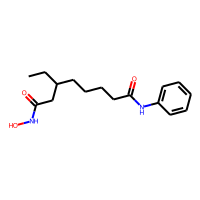
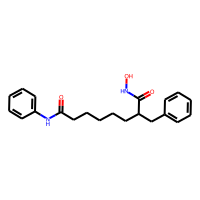
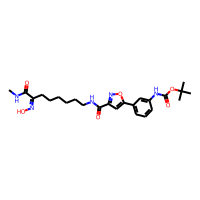
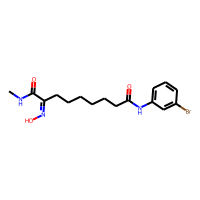
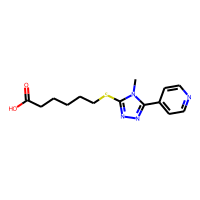

In [39]:
HTML(data_work.head().to_html())

In [40]:
PandasTools.WriteSDF(data_work, 'HDAC3_work.sdf', molColName='Molecule', properties=list(data.columns))